In [5]:
from imageai.Prediction import ImagePrediction
import os
import pandas as pd
import numpy as np
from PIL import Image
import joblib

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
%matplotlib inline 

In [6]:
execution_path = os.getcwd()

prediction = ImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(execution_path, "/home/mukut/Documents//Aikomi/weights/DenseNet.h5"))
prediction.loadModel()
TEST_PATH = '/home/mukut/Documents/Aikomi/ImageSet'
pred_array = np.empty((0,6),dtype=object)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


ValueError: You have specified an incorrect path to the DenseNet model file.

In [ ]:
for img in os.listdir(TEST_PATH):
    if img.endswith('.jpg'):
        image = Image.open(os.path.join(TEST_PATH, img))
        image = image.convert("RGB")
        image = np.array(image, dtype=np.uint8)
        predictions, probabilities = prediction.predictImage(os.path.join(TEST_PATH, img), result_count=5)
        temprow = np.zeros((1,pred_array.shape[1]),dtype=object)
        temprow[0,0] = img
        for i in range(len(predictions)):
            temprow[0,i+1] = predictions[i]
        pred_array = np.append(pred_array,temprow,axis=0)
        
pred_array_df = pd.DataFrame(data=pred_array,columns=['File_name','Tag_1','Tag_2','Tag_3','Tag_4','Tag_5'])  
joblib.dump(pred_array_df, 'pred_array_df.pkl')
#pred_array[:5]
pred_array_df.head()

In [ ]:
print(type(pred_array))

In [ ]:
pred_array_df.to_json(r'pred_array_df.json')

In [ ]:
x = pd.read_json(r'pred_array_df.json')
x

In [7]:
# Accumulating all generated tags in one list
all_tags = list()
for loop1 in range(np.shape(pred_array)[0]):
    for loop2 in range(1,np.shape(pred_array)[1]):
        one_tag = pred_array[loop1,loop2]
        all_tags.append(one_tag)
       
# Accumulating all the tags in a linear fashion
print(type(all_tags))
print(np.shape(all_tags))
all_tags[:7]

<class 'list'>
(650,)


['tree_frog',
 'green_lizard',
 'vine_snake',
 'green_snake',
 'tailed_frog',
 'steam_locomotive',
 'bulletproof_vest']

In [8]:
# generating word from letters
word_list = [d.split() for d in all_tags]
print(np.shape(word_list)[0])
print(type(word_list))
word_list[:7]

650
<class 'list'>


[['tree_frog'],
 ['green_lizard'],
 ['vine_snake'],
 ['green_snake'],
 ['tailed_frog'],
 ['steam_locomotive'],
 ['bulletproof_vest']]

In [ ]:
word_list[1]

In [9]:
model = Word2Vec(word_list,min_count= 1,size=2)

In [10]:
vector = list()
for word in word_list:
    vector.append(model[word])

/home/mukut/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(np.shape(vector))
vector[:7]

In [ ]:
vector_2 = model['tree_frog']
vector_2

In [ ]:
n_rows = 5
vect_first_pred = vector[:n_rows]
#print(vect_first_pred)
myarray = np.reshape(vect_first_pred, 2*n_rows)
#print(myarray[0])

Xaxis = list()
yaxis = list()
for loop1 in range(2*n_rows):
    if(loop1%2 ==0):
        Xaxis.append(myarray[loop1])
    else:
        yaxis.append(myarray[loop1])
    
#print("\nXaxis= ",Xaxis)
#print("yaxis= ",yaxis)

X = np.vstack((Xaxis, yaxis)).T

# KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [ ]:
np.shape(vector)

In [ ]:
np.shape(vector)[0]

In [ ]:
vector[:10]

# Plotting all the points

In [11]:
n_rows = 650
vect_first_pred = vector[:n_rows]
#print(vect_first_pred)
myarray = np.reshape(vect_first_pred, 2*n_rows)
#print(myarray[0])

Xaxis = list()
yaxis = list()
for loop1 in range(2*n_rows):
    if(loop1%2 ==0):
        Xaxis.append(myarray[loop1])
    else:
        yaxis.append(myarray[loop1])
    
#print("\nXaxis= ",Xaxis)
#print("yaxis= ",yaxis)

combined = np.vstack((Xaxis, yaxis)).T
X = combined
#combined

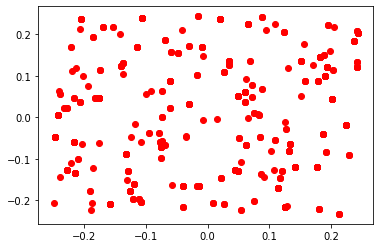

In [12]:
plt.plot(Xaxis,yaxis, 'ro')

<function matplotlib.pyplot.show>

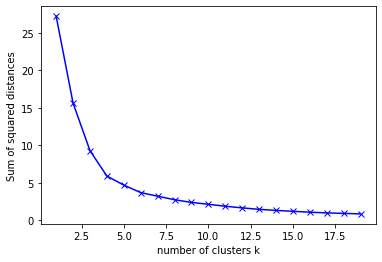

In [13]:
sum_squared_dist = []
K = range(1,20)
for k in K:
    km_bow = KMeans(n_clusters=k, random_state=0)
    km_bow = km_bow.fit(X)
    sum_squared_dist.append(km_bow.inertia_)
plt.plot(K, sum_squared_dist, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.show

In [4]:
type(sum_squared_dist)

NameError: name 'sum_squared_dist' is not defined

In [3]:
sum_squared_dist

NameError: name 'sum_squared_dist' is not defined

In [2]:
import numpy as np
np.median(sum_squared_dist)

NameError: name 'sum_squared_dist' is not defined

In [17]:
import statistics
statistics.mean(sum_squared_dist), round(statistics.mean(sum_squared_dist))

(4.649495824368275, 5.0)

In [18]:
int(round(statistics.mean(sum_squared_dist)))

5

## KMeans

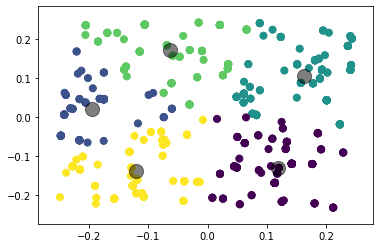

In [19]:
kmeans = KMeans(n_clusters= int(round(statistics.mean(sum_squared_dist))))
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [ ]:
print(np.shape(X))
np.shape(y_kmeans)

In [ ]:
y_kmeans[0]

In [ ]:
for loop8 in range(len(img_cluster)):
    img_name = list(pred_array_df[:loop8].File_name)
print(np.shape(img_name))
print(type(img_name))
img_name[0]

In [ ]:
print(type(img_cluster))
print(type(img_name))
print(np.shape(img_cluster))
print(np.shape(img_name))

In [ ]:
repeat_img = list()
for loop9 in range(1,(pred_array_df.shape)[0]+1):
    for loop10 in range(5):
        repeat_img.append(pred_array_df[loop9-1:loop9].File_name)

# getting cluster heads of each tags
cluster_center = list()
for loop5 in range(len(X)):
    cluster_center.append(y_kmeans[loop5])

tag_cluster = pd.DataFrame({'cluster_center': cluster_center,'image_tags': word_list })
tag_cluster['img_name'] = repeat_img 
print(tag_cluster.shape)
tag_cluster.head()

In [ ]:
M = X

rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
#This is optional
maxes = 1.1*np.amax(abs(M), axis = 0)

for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits
plt.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()

In [ ]:
X.shape

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
X.shape

In [ ]:
labels_true = y_kmeans

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels
                                           ))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [ ]:
print(__doc__)




# #############################################################################


# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Generating word cloud

In [ ]:
unique_words = set(all_tags)

import re
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(unique_words))

print(letters_only[:5])
letters_only

In [ ]:
# Link: https://www.datacamp.com/community/tutorials/wordcloud-python

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(letters_only)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()